In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram
%run CnotDecomp.ipynb #for importing ccx function
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from scipy import linalg

# IBMQ.save_account('fb30d6ed3e7c1557fe60e36b2c8818ea67ec079e4bc1a9d0ab89b0be7f42fdaf7a7934f3354e4bd67069ea5b783bdb6fa2c7826015aead948821b4ace90f4cf4

In [69]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
  

In [80]:
def toket(N,st):
    mat = eye(N)
    state = zeros(N)
    state = mat[:,st]
    return state

def outercalc(N,st1,st2):
    a=toket(N,st1)
    b=toket(N, st2)
    return outer(a,b)

def matrix(marked,gamma,N,adjunct):
    c = np.eye(2**N)*gamma
    c[marked][marked] = -c[marked][marked]
    #c = c*gamma
    matprint(c)
    if adjunct==True :
        mat = linalg.expm(-1j*c)
    else:
        mat = linalg.expm(1j*c)
    print()
    print()
  #  matprint(mat)
    print()
    print()
    print(mat.diagonal())
    print()
    print()
    return mat

def oracle(N,mat):
    qreg = QuantumRegister(N)
    qc = QuantumCircuit(qreg)
    qc.diagonal(mat.tolist(),qreg)
    qc = transpile(qc,basis_gates =['cx','u3'],optimization_level=3)
    return qc

3.14159        0         0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  
      0  3.14159         0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0

      0        0         0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  3.14159        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  
      0        0         0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  3.14159        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0

      0        0         0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  3.14159        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  
      0        0         0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  3.14159        0        0        0        0

      0        0         0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  3.14159        0  
      0        0         0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0

      0        0         0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  3.14159        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  
      0        0         0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  3.14159        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0

      0        0         0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  3.14159        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  
      0        0         0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  3.14159        0        0        0        0

      0        0         0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0  3.14159        0        0        0  
      0        0         0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0

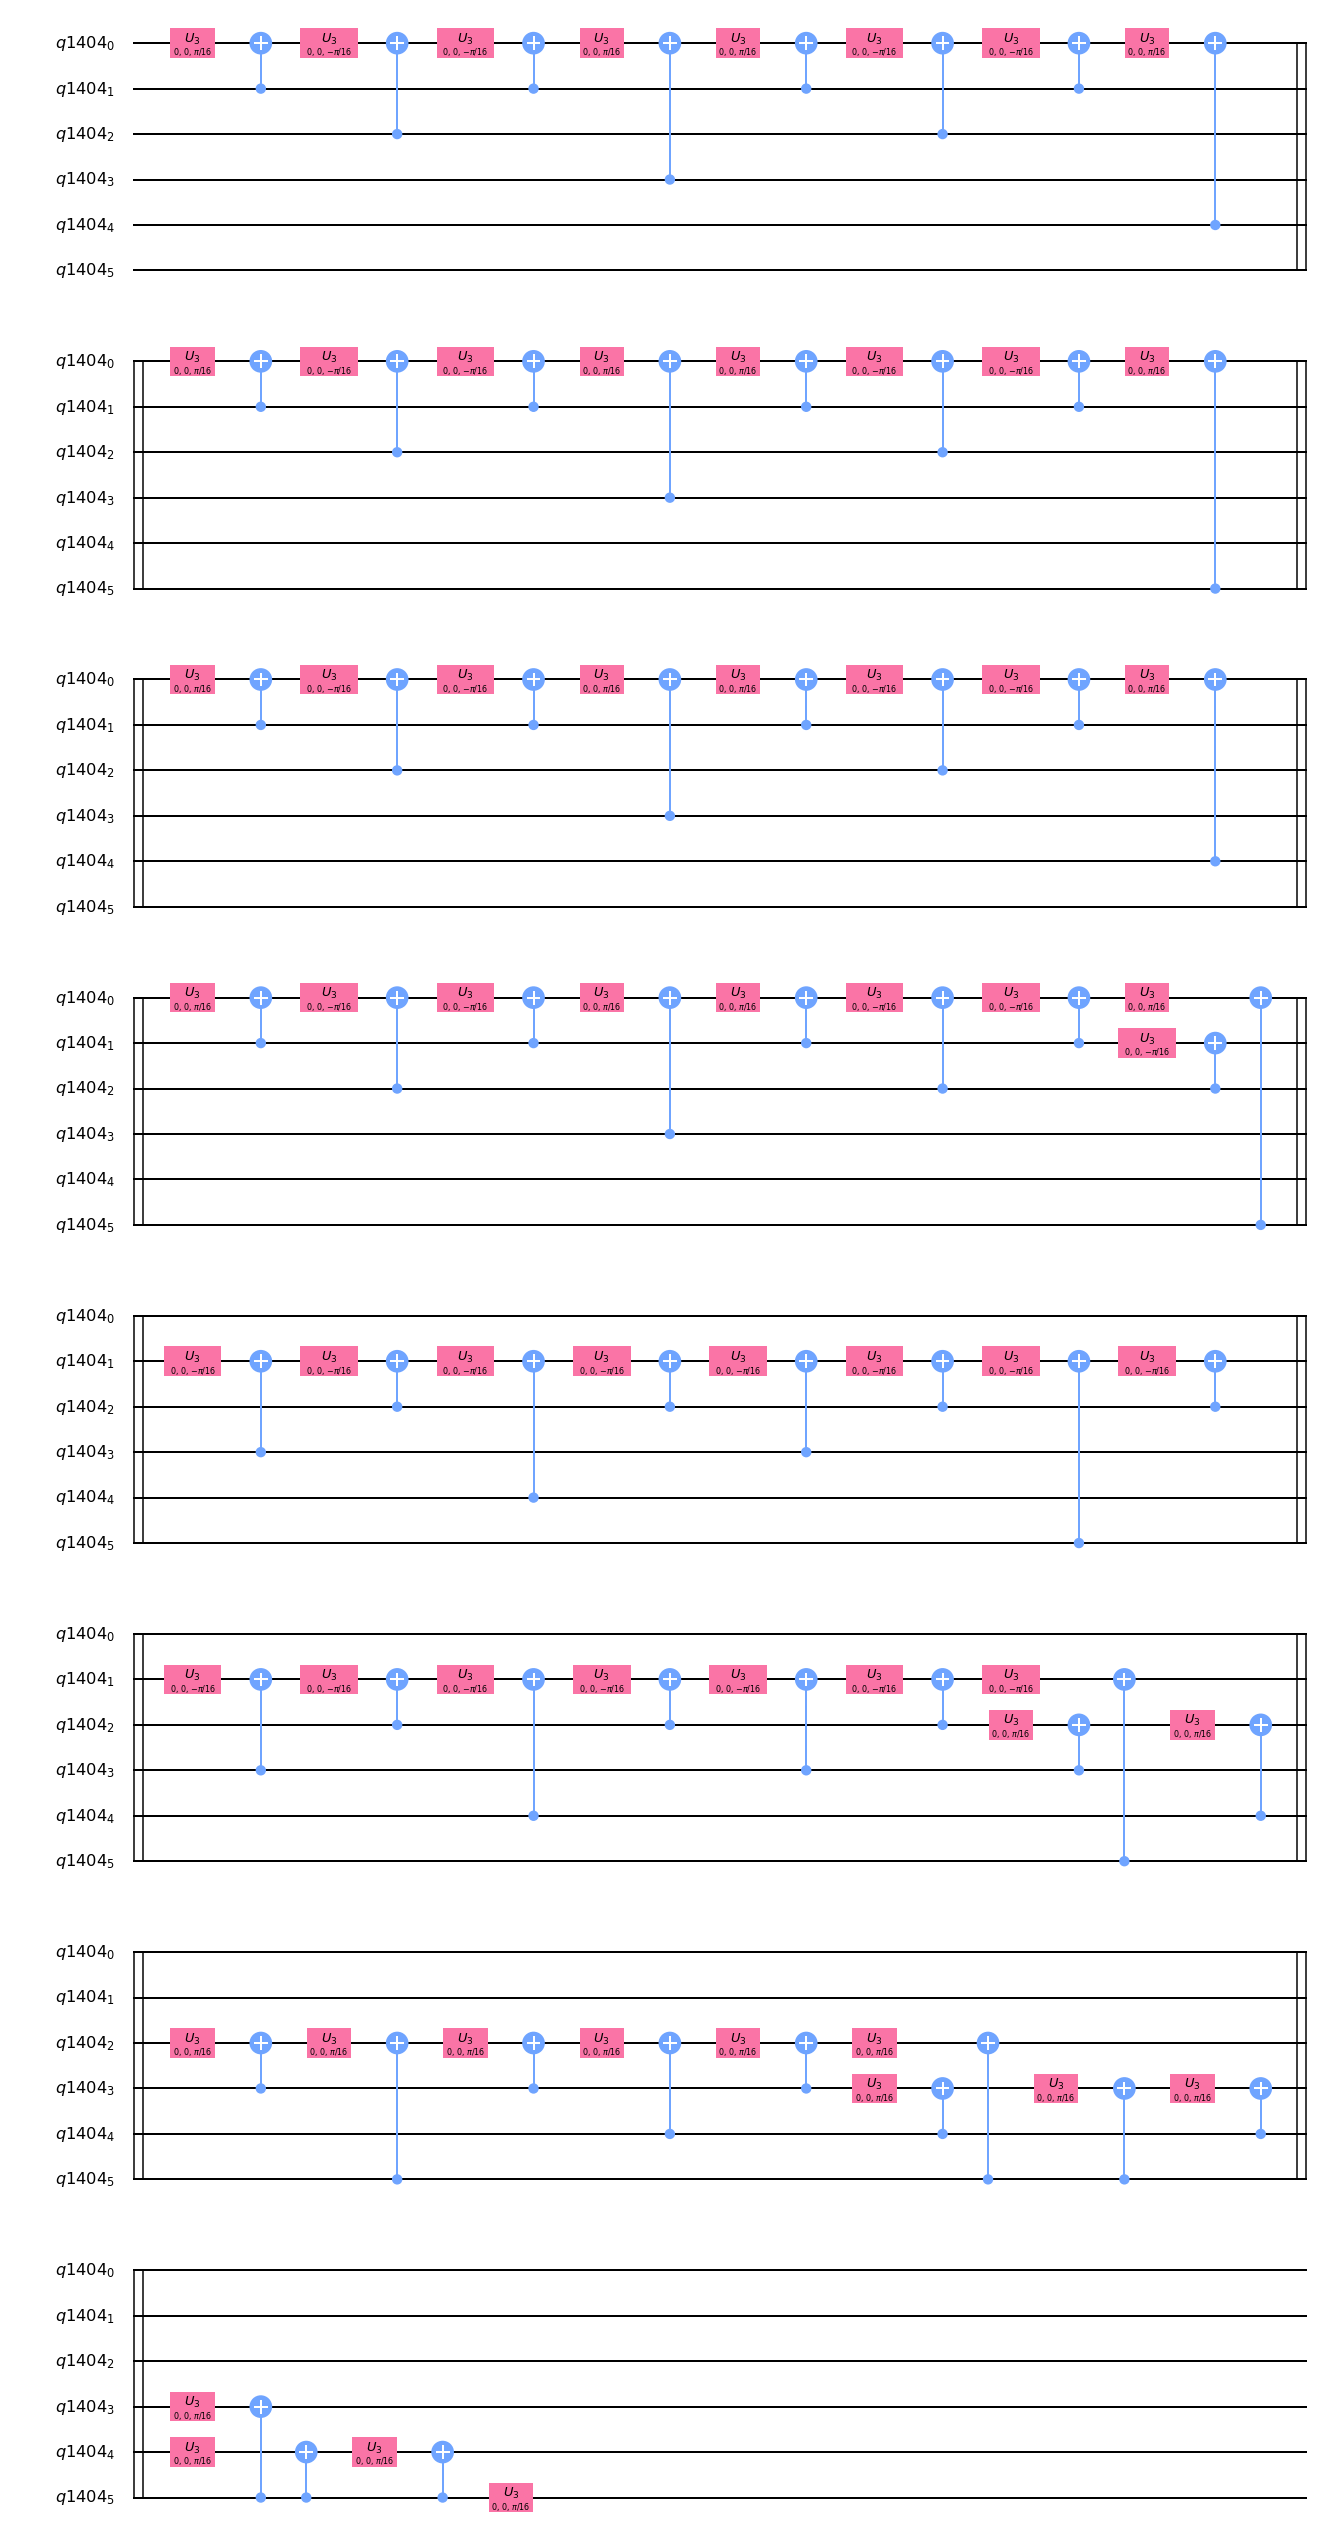

In [172]:
N=6
marked = 2
mat = matrix(marked,(np.pi),N,True).diagonal()
qcaux = oracle(N,mat)
qcaux.draw(output='mpl')

mat2 = matrix(marked,(np.pi),N,False).diagonal()
qcaux2 = oracle(N,mat2)
qcaux2.draw(output='mpl')

#print(mat)

In [173]:
qreg = QuantumRegister(N)
creg = ClassicalRegister(N)
qc = QuantumCircuit(qreg,creg)
angle = -((np.pi)/N)
steps =3

for t in range(steps):
    qc.append(qcaux,range(N))
    qc.rx(2*angle,qreg)
    qc.append(qcaux2,range(N))
    qc.rx(2*angle,qreg)
    qc.barrier()
    
qc.measure(qreg,creg)
qc.draw()

┌──────────────┐┌───────────┐┌──────────────┐┌───────────┐ ░ »
q1541_0: ┤0             ├┤ RX(-pi/3) ├┤0             ├┤ RX(-pi/3) ├─░─»
         │              │├───────────┤│              │├───────────┤ ░ »
q1541_1: ┤1             ├┤ RX(-pi/3) ├┤1             ├┤ RX(-pi/3) ├─░─»
         │              │├───────────┤│              │├───────────┤ ░ »
q1541_2: ┤2             ├┤ RX(-pi/3) ├┤2             ├┤ RX(-pi/3) ├─░─»
         │  circuit1423 │├───────────┤│  circuit1561 │├───────────┤ ░ »
q1541_3: ┤3             ├┤ RX(-pi/3) ├┤3             ├┤ RX(-pi/3) ├─░─»
         │              │├───────────┤│              │├───────────┤ ░ »
q1541_4: ┤4             ├┤ RX(-pi/3) ├┤4             ├┤ RX(-pi/3) ├─░─»
         │              │├───────────┤│              │├───────────┤ ░ »
q1541_5: ┤5             ├┤ RX(-pi/3) ├┤5             ├┤ RX(-pi/3) ├─░─»
         └──────────────┘└───────────┘└──────────────┘└───────────┘ ░ »
  c59_0: ═════════════════════════════════════════════════════════════»
                                                                      »
  c59_1: ═════════════════════════════════════════════════════════════»
                                                                      »
  c59_2: ═════════════════════════════════════════════════════════════»
                                                                      »
  c59_3: ═════════════════════════════════════════════════════════════»
                                                                      »
  c59_4: ═════════════════════════════════════════════════════════════»
                                                                      »
  c59_5: ═════════════════════════════════════════════════════════════»
                                                                      »
«         ┌──────────────┐┌───────────┐┌──────────────┐┌───────────┐ ░ »
«q1541_0: ┤0             ├┤ RX(-pi/3) ├┤0             ├┤ RX(-pi/3) ├─░─»
«         │              │├───────────┤│              │├───────────┤ ░ »
«q1541_1: ┤1             ├┤ RX(-pi/3) ├┤1             ├┤ RX(-pi/3) ├─░─»
«         │              │├───────────┤│              │├───────────┤ ░ »
«q1541_2: ┤2             ├┤ RX(-pi/3) ├┤2             ├┤ RX(-pi/3) ├─░─»
«         │  circuit1423 │├───────────┤│  circuit1561 │├───────────┤ ░ »
«q1541_3: ┤3             ├┤ RX(-pi/3) ├┤3             ├┤ RX(-pi/3) ├─░─»
«         │              │├───────────┤│              │├───────────┤ ░ »
«q1541_4: ┤4             ├┤ RX(-pi/3) ├┤4             ├┤ RX(-pi/3) ├─░─»
«         │              │├───────────┤│              │├───────────┤ ░ »
«q1541_5: ┤5             ├┤ RX(-pi/3) ├┤5             ├┤ RX(-pi/3) ├─░─»
«         └──────────────┘└───────────┘└──────────────┘└───────────┘ ░ »
«  c59_0: ═════════════════════════════════════════════════════════════»
«                                                                      »
«  c59_1: ═════════════════════════════════════════════════════════════»
«                                                                      »
«  c59_2: ═════════════════════════════════════════════════════════════»
«                                                                      »
«  c59_3: ═════════════════════════════════════════════════════════════»
«                                                                      »
«  c59_4: ═════════════════════════════════════════════════════════════»
«                                                                      »
«  c59_5: ═════════════════════════════════════════════════════════════»
«                                                                      »
«         ┌──────────────┐┌───────────┐┌──────────────┐┌───────────┐ ░ ┌─┐   »
«q1541_0: ┤0             ├┤ RX(-pi/3) ├┤0             ├┤ RX(-pi/3) ├─░─┤M├───»
«         │              │├───────────┤│              │├───────────┤ ░ └╥┘┌─┐»
«q1541_1: ┤1             ├┤ RX(-pi/3) ├┤1             ├┤ RX(-pi/3) ├─░──╫─┤M├»
«         │              │├───────────┤│              │├───────────┤

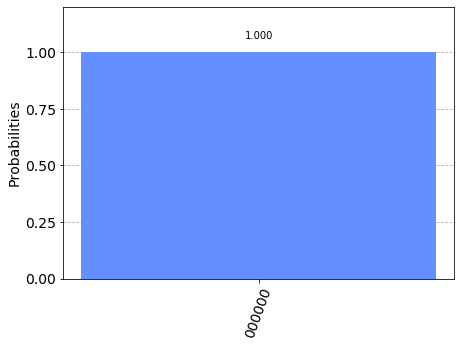

In [174]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend=backend,shots=1000)
result_sim = job_sim.result()
result_counts = result_sim.get_counts(qc)
plot_histogram(result_counts)